In [1]:
# READ THE DATA AND DECLARE IMPORTS FOR GRAPHING AND OTHER PROCESSING
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud, STOPWORDS

In [2]:
# access and read the dataset
dataset = "Love_and_War.csv"
data = pd.read_csv(dataset)
data.describe()

,What is your gender?,"Shakespeare famously said, that ""all is fair in love and war."" Do you agree with this?","Consider the following situation:\nJohn is attracted to a woman named Rebecca. John's friend Mark is also interested in Rebecca. Rebecca is extremely beautiful. If John were to begin a relationship with Rebecca, all of his friends would be envious of him including Mark who has strong feelings for her. There is another problem. John knows that his family would not approve of Rebecca because of her skin color. John is unsure of how to proceed. Rebecca has already indicated that she is attracted to him and if John would like to begin a relationship with her all he has to do is tell her how he feels. \nWhat are your thoughts on this situation? (Be as detailed as you like in your response.)",What are some of the things that people should consider when pursuing a romantic relationship with someone else? (Be as detailed as you like in your response)
count,280,280,280,280
unique,4,3,280,279
top,Male,Maybe,I think John should talk to Mark who is his be...,\nknow they respect your boundaries. feel safe...
freq,155,111,1,2


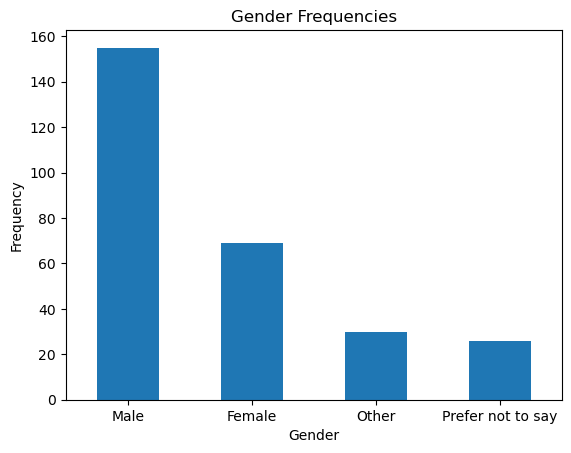

In [3]:
# Calculate gender frequencies
gender_freq = data['What is your gender?'].value_counts()

# Create a bar graph of the gender frequencies
gender_plot = gender_freq.plot(kind='bar')

# Set the axis labels and title
gender_plot.set_xlabel('Gender')
gender_plot.set_ylabel('Frequency')
gender_plot.set_title('Gender Frequencies')

# Rotate the x-axis tick labels
plt.xticks(rotation=0)

fig1 = plt.gcf()
fig1.savefig('Gender_Frequencies.png', dpi=300)

# Show the plot
plt.show()

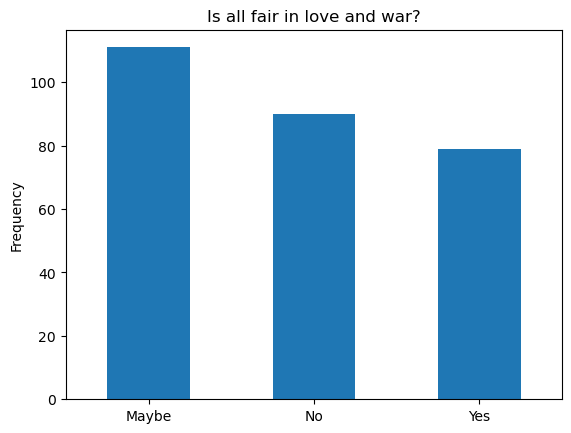

In [4]:
# Is all fair in love and war?
fairness_freq = data['Shakespeare famously said, that "all is fair in love and war." Do you agree with this?'].value_counts()

# Create a bar graph of the fairness frequencies
fairness_plot = fairness_freq.plot(kind='bar')

# Set the axis labels and title
fairness_plot.set_ylabel('Frequency')
fairness_plot.set_title('Is all fair in love and war?')

# Rotate the x-axis tick labels
plt.xticks(rotation=0)

fig2 = plt.gcf()
fig2.savefig('Fairness_Frequencies.png', dpi=300)

# Show the plot
plt.show()

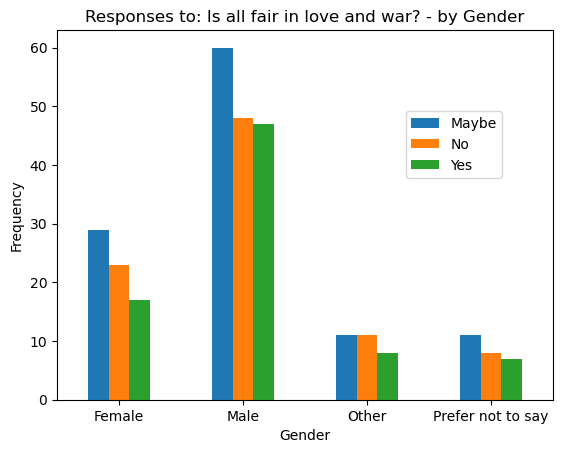

In [5]:
fairness_by_gender = pd.crosstab(data['What is your gender?'], data['Shakespeare famously said, that "all is fair in love and war." Do you agree with this?'])

# Create a bar graph of the contingency table
ax = fairness_by_gender.plot(kind='bar')

# Set the axis labels and title
ax.set_xlabel('Gender')
ax.set_ylabel('Frequency')
ax.set_title('Responses to: Is all fair in love and war? - by Gender')

# Set the position of the legend
ax.legend(loc='upper center', bbox_to_anchor=(0.8, 0.8), ncol=1)

# Rotate the x-axis tick labels
plt.xticks(rotation=0)

fig3 = plt.gcf()
fig3.savefig('Gender_vs_Fairness.png', dpi=300)

# Show the plot
plt.show()

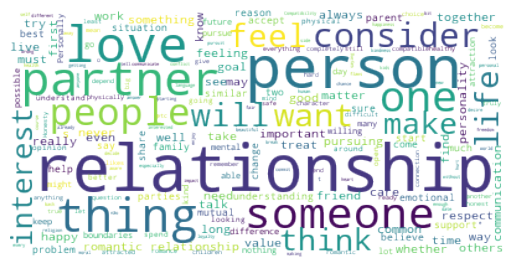

In [6]:
reasons = ' '.join(data["What are some of the things that people should consider when pursuing a romantic relationship with someone else? (Be as detailed as you like in your response)"])

# Add new words to the exclusion list
common_stopwords = set(STOPWORDS)
common_stopwords.update(["trust", "cautious", "trusting"])


# Generate a word cloud image
wordcloud = WordCloud(mode='RGBA',
                      background_color='rgba(255, 255, 255, 0)', 
                      stopwords=common_stopwords, 
                      prefer_horizontal=0.9,
                      collocations=True,
                      collocation_threshold=50,
                      margin=0).generate(reasons)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

fig4 = plt.gcf()
fig4.savefig('Reasoning_WordCloud.png', dpi=300, transparent=True)

plt.show()

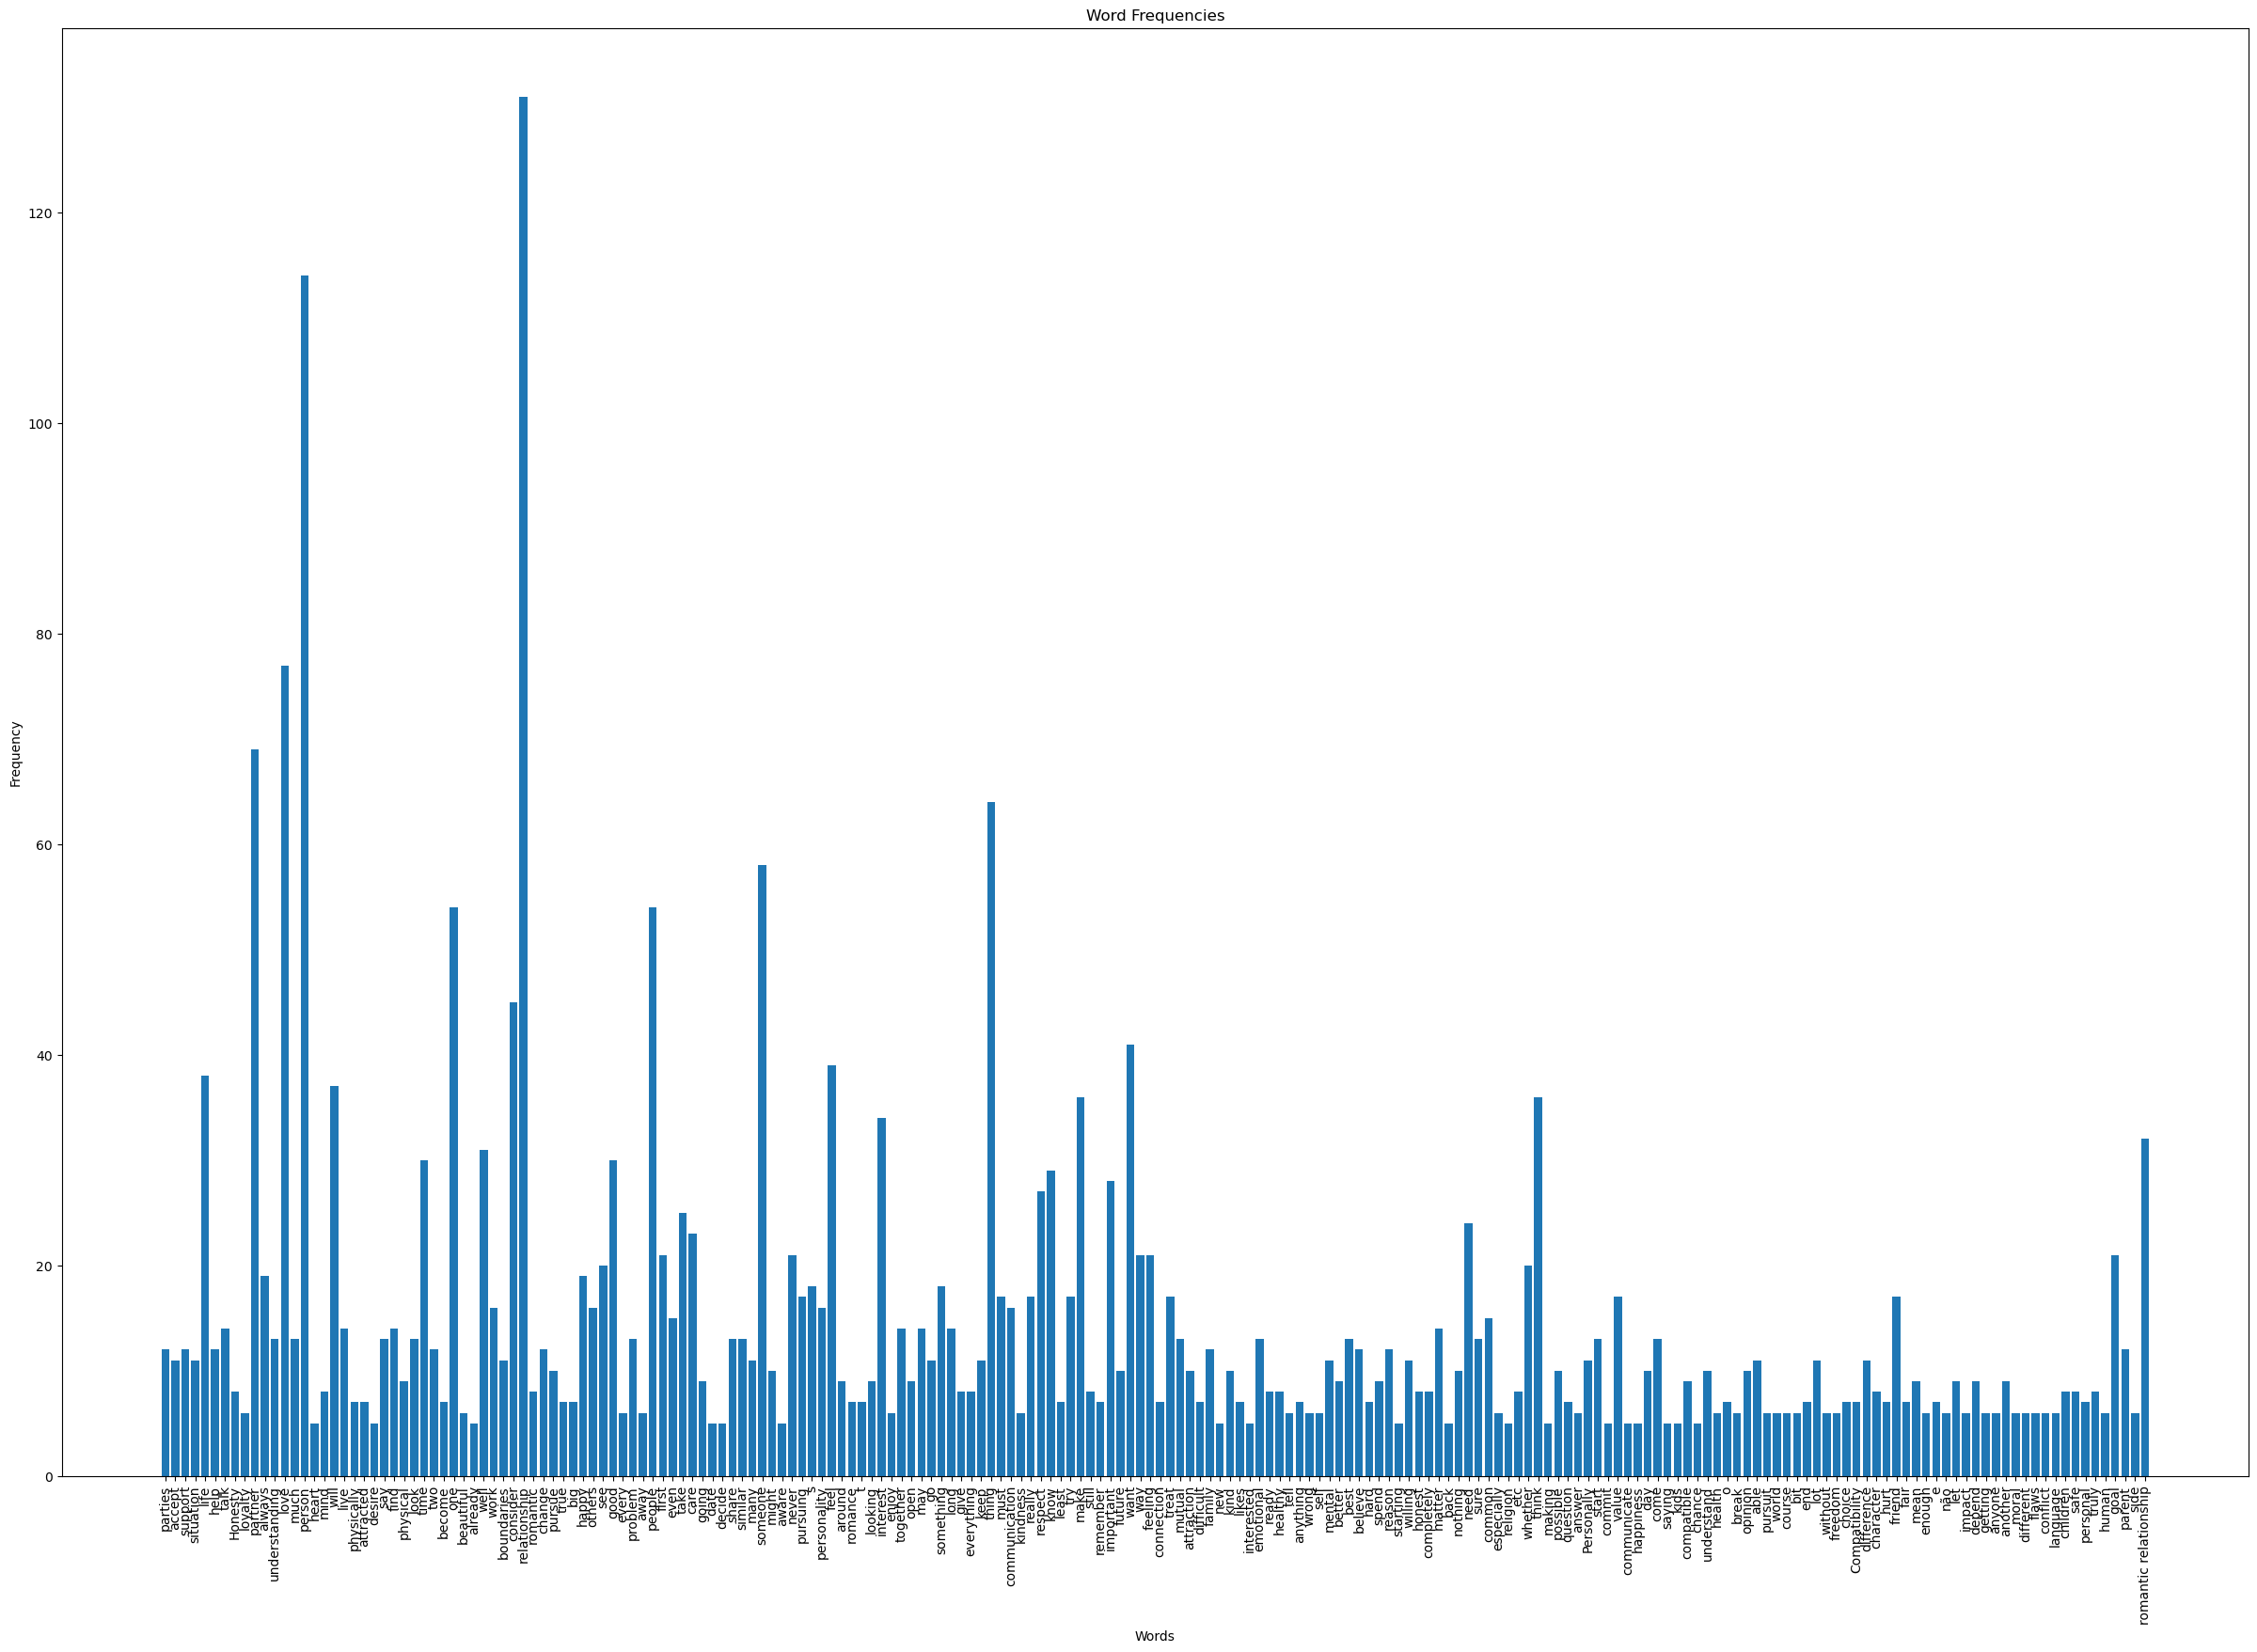

In [7]:
# Generate word frequency dictionary for words displayed in wordcloud
word_freq = {word: freq for word, freq in wordcloud.process_text(reasons).items() if word in wordcloud.words_}

# Plot word frequency bar chart
fig_size = plt.figure()
fig_size.set_figwidth(30)
fig_size.set_figheight(20)
plt.bar(word_freq.keys(), word_freq.values())
plt.title('Word Frequencies')
plt.xlabel('Words')
plt.ylabel('Frequency')

# Rotate the x-axis tick labels
plt.xticks(rotation=90)

fig5 = plt.gcf()
fig5.savefig('Reasoning_WordFrequencies.png', dpi=300)

plt.show()